In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
df_comp = pd.read_csv('pogoda2_pv.csv')
df_comp

,timestamp,data,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,uv_radiation,pm2.5,pv_voltage,pv_current,battery_voltage,battery_current
0,21-05-2021T16:21:01,21-05-2021T16:21,21.244,3.894,322,33.985,985.535,34382.801,198.0,10.22,1.7,73.77,2.4,47.73,3.6
1,21-05-2021T16:22:01,21-05-2021T16:22,21.188,2.121,269,33.986,985.603,34601.801,199.2,10.29,1.0,79.49,2.2,47.73,3.6
2,21-05-2021T16:23:01,21-05-2021T16:23,21.160,6.357,262,33.801,985.447,35530.898,204.6,10.57,1.0,79.03,2.3,50.65,3.5
3,21-05-2021T16:24:01,21-05-2021T16:24,21.045,2.433,292,34.229,985.547,36529.301,210.3,10.93,1.0,76.62,2.5,51.13,3.7
4,21-05-2021T16:25:02,21-05-2021T16:25,21.070,1.773,140,34.945,985.585,38342.199,220.9,11.46,0.6,74.97,2.6,51.47,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132461,09-09-2021T13:59:01,09-09-2021T13:59,26.886,1.368,198,35.233,994.439,75351.203,433.9,21.30,6.0,75.99,0.4,54.72,0.5
132462,09-09-2021T14:00:02,09-09-2021T14:00,26.960,1.382,194,33.530,994.427,75324.102,433.8,21.33,5.8,76.14,0.4,54.70,0.5
132463,09-09-2021T14:01:01,09-09-2021T14:01,27.017,1.787,203,33.237,994.394,75073.102,432.3,21.26,10.0,75.98,0.4,54.72,0.5
132464,09-09-2021T14:02:01,09-09-2021T14:02,27.151,2.998,140,33.558,994.423,74817.203,430.9,21.26,9.1,75.79,0.4,54.72,0.5


In [27]:
df_comp['Power'] = df_comp['pv_voltage'] * df_comp['pv_current'] 
df_comp.drop(['pv_voltage','pv_current', 'battery_voltage', 'battery_current','luminance','uv_radiation'], axis = 1, inplace = True)
df_comp.drop(['temperature','wind_speed', 'wind_dir', 'humidity','air_pressure','solar_radiation','pm2.5','timestamp'], axis = 1, inplace = True)
df_comp

,data,Power
0,21-05-2021T16:21,177.048
1,21-05-2021T16:22,174.878
2,21-05-2021T16:23,181.769
3,21-05-2021T16:24,191.550
4,21-05-2021T16:25,194.922
...,...,...
132461,09-09-2021T13:59,30.396
132462,09-09-2021T14:00,30.456
132463,09-09-2021T14:01,30.392
132464,09-09-2021T14:02,30.316


In [28]:
df_comp.describe()

,Power
count,132466.000000
mean,70.076058
std,99.300244
min,0.000000
25%,0.000000
50%,26.062000
75%,100.770000
max,503.712000


In [29]:
df_comp.isna()

,data,Power
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
132461,False,False
132462,False,False
132463,False,False
132464,False,False


In [30]:
df_comp.isna().sum()

data     0
Power    0
dtype: int64

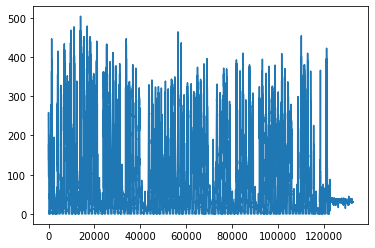

In [31]:
df_comp.Power.plot()
plt.show()

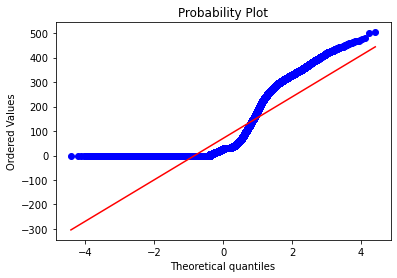

In [32]:
import scipy.stats
import pylab
scipy.stats.probplot(df_comp.Power, plot=pylab)
pylab.show()

In [33]:
df_comp.data=pd.to_datetime(df_comp.data, dayfirst=True)

In [34]:
df.data.describe()

count               132466
unique              132466
top       13-06-2021T04:30
freq                     1
Name: data, dtype: object

In [35]:
df_comp.set_index('data', inplace=True)
df_comp

,Power
data,
2021-05-21 16:21:00,177.048
2021-05-21 16:22:00,174.878
2021-05-21 16:23:00,181.769
2021-05-21 16:24:00,191.550
2021-05-21 16:25:00,194.922
...,...
2021-09-09 13:59:00,30.396
2021-09-09 14:00:00,30.456
2021-09-09 14:01:00,30.392


In [37]:
df_comp.asfreq('T')

,Power
data,
2021-05-21 16:21:00,177.048
2021-05-21 16:22:00,174.878
2021-05-21 16:23:00,181.769
2021-05-21 16:24:00,191.550
2021-05-21 16:25:00,194.922
...,...
2021-09-09 13:59:00,30.396
2021-09-09 14:00:00,30.456
2021-09-09 14:01:00,30.392


In [38]:
df_comp.isna()

,Power
data,
2021-05-21 16:21:00,False
2021-05-21 16:22:00,False
2021-05-21 16:23:00,False
2021-05-21 16:24:00,False
2021-05-21 16:25:00,False
...,...
2021-09-09 13:59:00,False
2021-09-09 14:00:00,False
2021-09-09 14:01:00,False


In [39]:
df_comp.isna().sum()

Power    0
dtype: int64

In [40]:
size=int(len(df_comp)*0.8)
df=df_comp.iloc[:size]
df_test=df_comp.iloc[size:]

In [41]:
wn=np.random.normal(loc=df.Power.mean(), scale=df.Power.std(), size=len(df))

In [42]:
df['wn']=wn

<ipython-input-42-668c275da1fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn']=wn


In [43]:
df.describe()

,Power,wn
count,105972.000000,105972.000000
mean,77.351113,77.601101
std,105.129497,105.252592
min,0.000000,-414.322380
25%,0.000000,6.430137
50%,23.280000,77.503223
75%,126.864000,148.183903
max,503.712000,550.599624


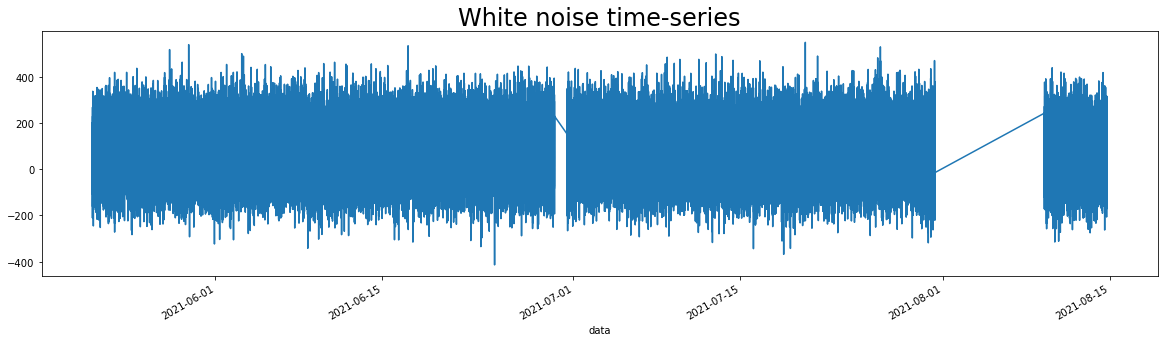

In [44]:
df.wn.plot(figsize=(20,5))
plt.title("White noise time-series", size =24)
plt.show()

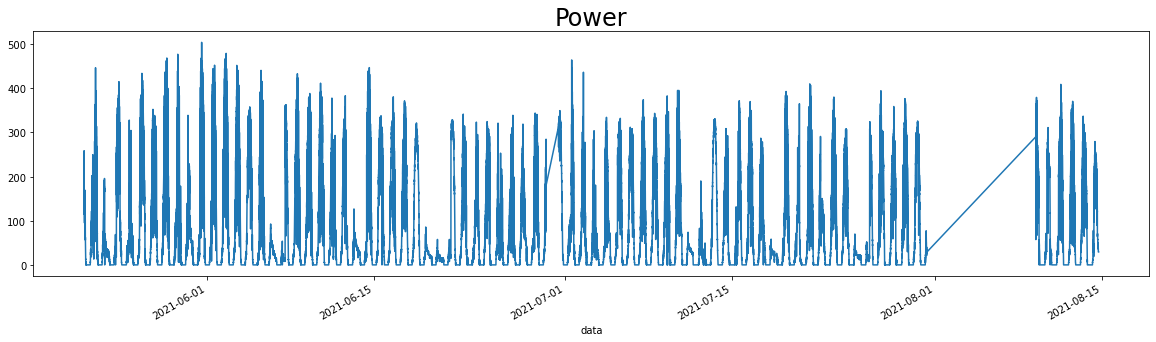

In [45]:
df.Power.plot(figsize=(20,5))
plt.title("Power",size=24)
plt.show()

In [46]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df.Power)

(-10.325216289229806,
 2.937890215881457e-18,
 69,
 105902,
 {'1%': -3.430411750094541,
  '5%': -2.861567292591112,
  '10%': -2.566784526888298},
 969372.2679224533)

In [47]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df.wn)

(-228.93041434161182,
 0.0,
 1,
 105970,
 {'1%': -3.4304117104690985,
  '5%': -2.8615672750774586,
  '10%': -2.5667845175663633},
 1286752.2714146131)

<function matplotlib.pyplot.show(close=None, block=None)>

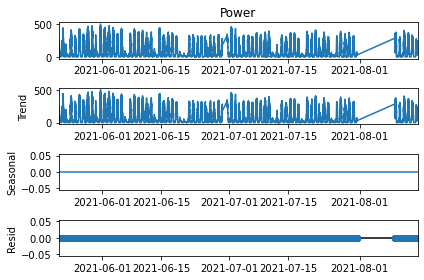

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_additive=seasonal_decompose(df.Power, model="additive",period=1)
s_dec_additive.plot()
plt.show

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
s_dec_additive=seasonal_decompose(df.Power, model="multiplicative",period=1)
s_dec_additive.plot()
plt.show

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

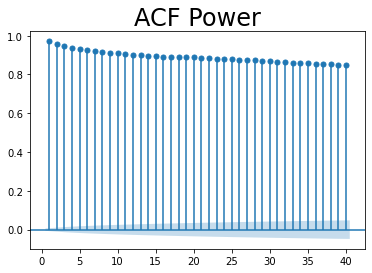

In [56]:
sgt.plot_acf(df.Power, lags=40, zero=False)
plt.title("ACF Power", size=24)
plt.show()

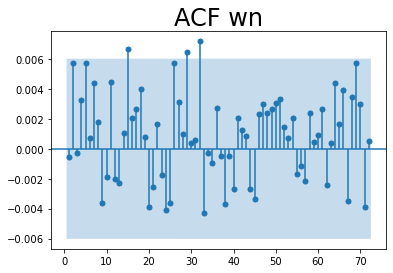

In [57]:
sgt.plot_acf(df.wn, lags=72, zero=False)
plt.title("ACF wn", size=24)
plt.show()

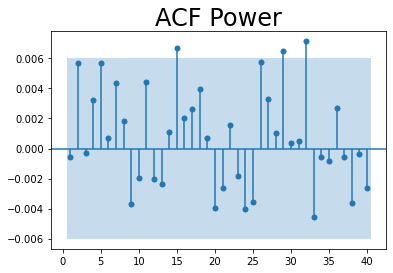

In [58]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title("ACF Power", size=24)
plt.show()

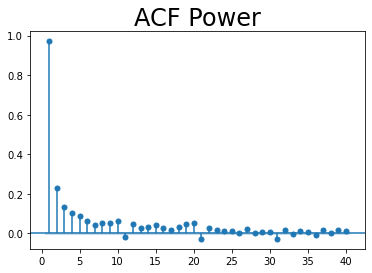

In [59]:
sgt.plot_pacf(df.Power, lags=40, zero=False, method=('ols'))
plt.title("ACF Power", size=24)
plt.show()

In [60]:
model_ar=ARMA(df.Power, order=(1,0))
results_ar=model_ar.fit()
results_ar.summary()

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Power   No. Observations:               105972
Model:                     ARMA(1, 0)   Log Likelihood             -491566.343
Method:                       css-mle   S.D. of innovations             25.020
Date:                Thu, 06 Jan 2022   AIC                         983138.686
Time:                        19:26:37   BIC                         983167.399
Sample:                             0   HQIC                        983147.377
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          77.3511      2.674     28.931      0.000      72.111      82.591
ar.L1.Power     0.9713      0.001   1328.704      0.000       0.970       0.973
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0296           +0.0000j            1.0296            0.0000
-----------------------------------------------------------------------------
"""

In [61]:
model_ar2=ARMA(df.Power, order=(2,0))
results_ar2=model_ar2.fit()
results_ar2.summary()

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Power   No. Observations:               105972
Model:                     ARMA(2, 0)   Log Likelihood             -488710.269
Method:                       css-mle   S.D. of innovations             24.355
Date:                Thu, 06 Jan 2022   AIC                         977428.538
Time:                        19:26:44   BIC                         977466.822
Sample:                             0   HQIC                        977440.126
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          77.3511      3.375     22.920      0.000      70.736      83.966
ar.L1.Power     0.7488      0.003    250.411      0.000       0.743       0.755
ar.L2.Power     0.2291      0.003     76.609      0.000       0.223       0.235
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0183           +0.0000j            1.0183            0.0000
AR.2           -4.2870           +0.0000j            4.2870            0.5000
-----------------------------------------------------------------------------
"""

In [62]:
model_ar3=ARMA(df.Power, order=(3,0))
results_ar3=model_ar3.fit()
results_ar3.summary()

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Power   No. Observations:               105972
Model:                     ARMA(3, 0)   Log Likelihood             -487752.625
Method:                       css-mle   S.D. of innovations             24.136
Date:                Thu, 06 Jan 2022   AIC                         975515.250
Time:                        19:26:52   BIC                         975563.105
Sample:                             0   HQIC                        975529.735
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          77.3511      3.860     20.037      0.000      69.785      84.917
ar.L1.Power     0.7181      0.003    235.893      0.000       0.712       0.724
ar.L2.Power     0.1289      0.004     34.469      0.000       0.122       0.136
ar.L3.Power     0.1338      0.003     43.963      0.000       0.128       0.140
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0139           -0.0000j            1.0139           -0.0000
AR.2           -0.9884           -2.5284j            2.7148           -0.3093
AR.3           -0.9884           +2.5284j            2.7148            0.3093
-----------------------------------------------------------------------------
"""

In [63]:
def LLR_test(mod_1, mod_2, DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF)
    return p

In [64]:
LLR_test(model_ar2, model_ar3)

0.0

In [65]:
df['returns']=df.Power.pct_change(1).mul(100)
df=df.iloc[1:]

<ipython-input-65-4c54db82df46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns']=df.Power.pct_change(1).mul(100)


In [66]:
df.returns

data
2021-05-21 16:22:00   -1.225656
2021-05-21 16:23:00    3.940461
2021-05-21 16:24:00    5.381006
2021-05-21 16:25:00    1.760376
2021-05-21 16:26:00    9.622310
                         ...   
2021-08-14 17:57:00    0.177936
2021-08-14 17:58:00    0.204946
2021-08-14 17:59:00   -0.122716
2021-08-14 18:00:00    0.000000
2021-08-14 18:01:00    0.000000
Name: returns, Length: 105971, dtype: float64

In [67]:
df.isna()

,Power,wn,returns
data,,,
2021-05-21 16:22:00,False,False,False
2021-05-21 16:23:00,False,False,False
2021-05-21 16:24:00,False,False,False
2021-05-21 16:25:00,False,False,False
2021-05-21 16:26:00,False,False,False
...,...,...,...
2021-08-14 17:57:00,False,False,False
2021-08-14 17:58:00,False,False,False
2021-08-14 17:59:00,False,False,False


In [68]:
df.isna().sum()

Power          0
wn             0
returns    38950
dtype: int64

In [220]:
sts.adfuller(df.returns)

MissingDataError: exog contains inf or nans